In [1]:
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
%config linelineBacked.figure_format = {'png', 'retina'}


from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 주제선정동기, 개요, 목적

In [3]:
df_final = pd.read_excel("./datas/df_final.xls", "sheet")
df_final = df_final.drop(["Unnamed: 0", "Unnamed: 0.1", "Date"], axis=1)
df_final["Count"] = 1
df_final.tail(2)

,Change,Symbol,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
1516,0.0067,WMT,-335.0,335.0,-0.002,2014-09-16,내란,예멘내전,156000,19,1
1517,0.0118,XOM,-393.0,393.0,-0.003,2014-09-16,내란,예멘내전,156000,19,1


In [4]:
# 빈도분석(barplot, heatmap 등 활용)

In [5]:
## (1) 전쟁의 수(2000~2021년 미국참전 전쟁의 수)

In [6]:
war_count = df_final.pivot_table(["Count", "Count_country", "War_volume"], ["Start_date","War_name"])
war_count["War_id"] = ["w1","w2","w3","w4","w5","w6","w7","w8","w9","w10","w11","w12","w13","w14",
                      "w15","w16","w17","w18","w19","w20","w21","w22","w23"]

In [67]:
war_count

,,Count,Count_country,War_volume,War_id
Start_date,War_name,,,,
2001-09-11,테러와의전쟁,1,48,1000000,w1
2002-01-15,영원한자유작전-필리핀,1,2,115800,w2
2002-10-07,영원한자유작전-아프리카의뿔,1,38,500000,w3
2003-03-20,이라크전쟁,1,41,1000000,w4
2004-04-01,이란-PJAK충돌,1,3,17000,w5
2004-04-18,예멘의 Houthi 반란,1,7,32000,w6
2005-08-27,파라과이인민군반란,1,3,3650,w7
2006-01-25,파타-하마스 분쟁,1,3,55000,w8
2006-02-22,이라크내전,1,5,748000,w9


In [8]:
#### (그래프)전쟁별 참전국수

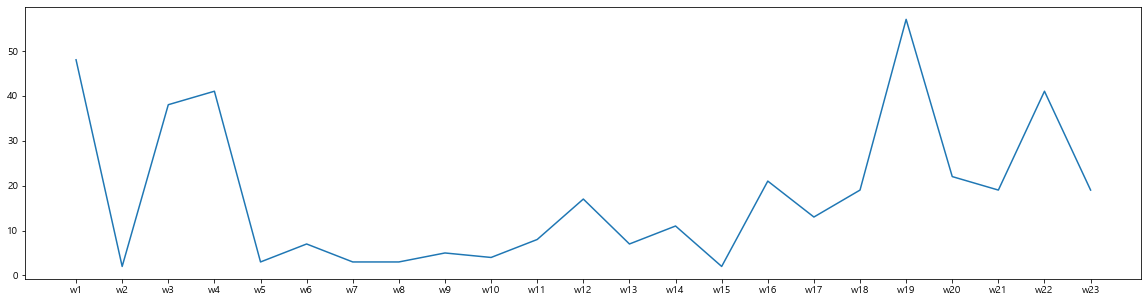

In [9]:
plt.figure(figsize=(20,5))
X = war_count["War_id"]
y_1 = war_count["Count_country"]
plt.plot(X, y_1)
plt.show()

In [10]:
#### (그래프)전쟁별 전쟁규모

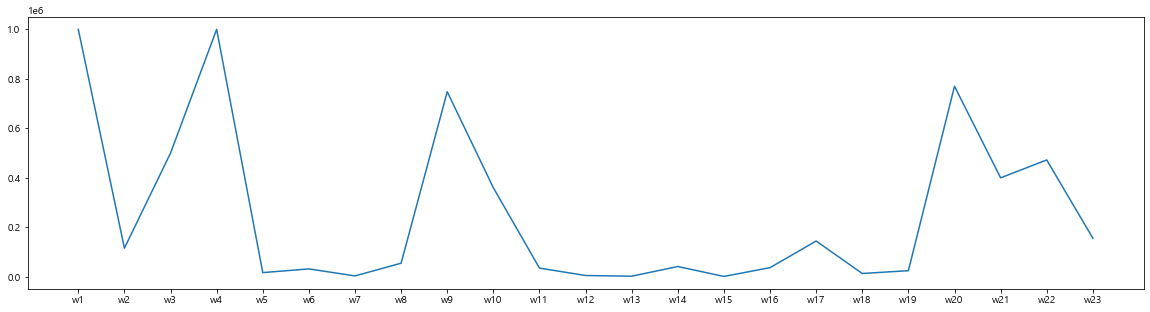

In [11]:
plt.figure(figsize=(20,5))
X = war_count["War_id"]
y_2 = war_count["War_volume"]
plt.plot(X, y_2)
plt.show()

In [12]:
### (1)-1 전쟁종류(민족간전쟁/해적/마약/테러)별 전쟁수 count

In [13]:
ls_war = pd.read_excel("datas/ls_war.xls", "sheet")
ls_war = ls_war.drop(["Unnamed: 0","전쟁수"], axis=1)
ls_war["Count"] = 1
ls_war["War_Scale"] = ls_war["참전국수"]
ls_war.head()

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3


In [14]:
war_genre = ls_war.pivot_table("Count","갈등종류", aggfunc=np.sum, fill_value=0)
war_genre["War_genre"]= war_genre.index
war_genre

,Count,War_genre
갈등종류,,
내란,12,내란
마약,2,마약
민족,2,민족
테러,10,테러
해적,2,해적


In [15]:
#### (그래프) 2000년이후 갈등종류별 전쟁수

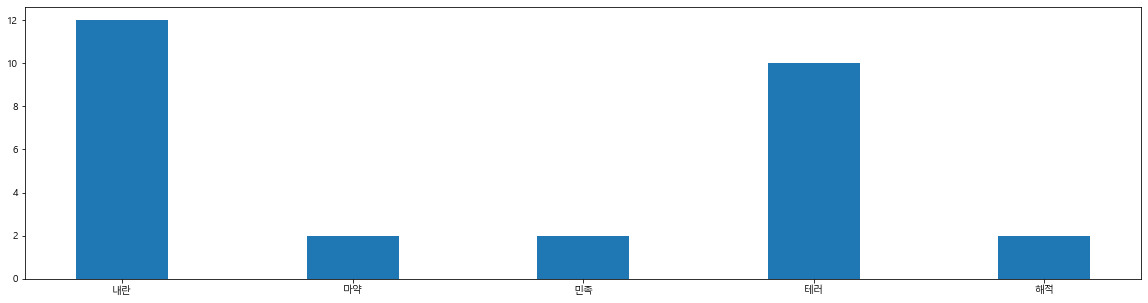

In [16]:
plt.figure(figsize=(20,5))
X = war_genre["War_genre"]
y = war_genre["Count"]
plt.bar(X, y, width=0.4)
plt.show()

In [17]:
### (1)-2 전쟁참전국수별 (0~20, 21~40, 41개국이상) 전쟁수 count

In [18]:
a= ls_war[ls_war["참전국수"]<=10] # 10개국 미만 참전 "소규모"

In [19]:
a

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3
5,2004-04-18,예멘의 Houthi 반란,내란,32000,7,1,7
6,2005-08-27,파라과이인민군반란,내란,3650,3,1,3
7,2006-01-25,파타-하마스 분쟁,테러,55000,3,1,3
8,2006-06-12,2006년레바논전쟁,테러,10500,2,1,2
9,2006-02-22,이라크내전,내란,748000,5,1,5
10,2006-12-11,멕시코마약전쟁,마약,360000,4,1,4
11,2006-12-30,소말리아전쟁,해적,35250,8,1,8
13,2008-03-25,2008 안주안침공,내란,2500,7,1,7


In [20]:
b= ls_war[(ls_war["참전국수"] > 10)&(ls_war["참전국수"] <= 20)] # 11~20개국 참전 "중간규모"

In [21]:
b

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
12,2007-02-06,영원한자유작전-트랜스사하라,테러,5325,17,1,17
14,2009-07-26,보코하람반란,내란,10000,19,1,19
15,2009-01-31,소말리아내전,해적,41600,11,1,11
18,2011-03-15,시리아내전,내란,144600,13,1,13
19,2011-06-17,레바논에서의시리아내전파급,내란,13500,19,1,19
22,2014-05-16,리비아 내전,내란,400000,19,1,19
24,2014-09-16,예멘내전,내란,156000,19,1,19
26,2017-12-09,이라크반란,내란,188900,13,1,13
27,2019-05-05,2019-20 페르시아만위기,민족,10000,13,1,13


In [22]:
c= ls_war[(ls_war["참전국수"] > 20)] # 20개국 초과 참전 "대규모"

In [23]:
c

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
17,2011-02-15,리비아내전,내란,37000,21,1,21
20,2012-01-16,북부말리전쟁,테러,24764,57,1,57
21,2013-12-30,이라크 내전,내란,770000,22,1,22
23,2014-06-13,ISIL에대한국제군사개입,테러,472260,41,1,41


In [24]:
#### (그래프) 2000년이후 전쟁의 참전국 규모에 따른 전쟁수(소,중,대)

In [25]:
### (1)-3 전쟁규모별 (병력수 1k이하, 10k미만, 10k이상) 전쟁수 count

In [26]:
a_1= ls_war[ls_war["전쟁규모"]<30*1000] # 병력 3만미만 참전 "S1"

In [27]:
a_1

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3
6,2005-08-27,파라과이인민군반란,내란,3650,3,1,3
8,2006-06-12,2006년레바논전쟁,테러,10500,2,1,2
12,2007-02-06,영원한자유작전-트랜스사하라,테러,5325,17,1,17
13,2008-03-25,2008 안주안침공,내란,2500,7,1,7
14,2009-07-26,보코하람반란,내란,10000,19,1,19
16,2010-05-23,킹스톤불안,마약,1500,2,1,2
19,2011-06-17,레바논에서의시리아내전파급,내란,13500,19,1,19
20,2012-01-16,북부말리전쟁,테러,24764,57,1,57
25,2017-05-23,마라위위기,테러,7500,5,1,5


In [28]:
b_2= ls_war[(ls_war["전쟁규모"] >= 30*1000)&(ls_war["전쟁규모"] < 500*1000)] # 3~50만병력 참전 "S2"

In [29]:
b_2

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
5,2004-04-18,예멘의 Houthi 반란,내란,32000,7,1,7
7,2006-01-25,파타-하마스 분쟁,테러,55000,3,1,3
10,2006-12-11,멕시코마약전쟁,마약,360000,4,1,4
11,2006-12-30,소말리아전쟁,해적,35250,8,1,8
15,2009-01-31,소말리아내전,해적,41600,11,1,11
17,2011-02-15,리비아내전,내란,37000,21,1,21
18,2011-03-15,시리아내전,내란,144600,13,1,13
22,2014-05-16,리비아 내전,내란,400000,19,1,19
23,2014-06-13,ISIL에대한국제군사개입,테러,472260,41,1,41


In [30]:
c= ls_war[(ls_war["전쟁규모"] >= 500*1000)] # 50만이상 병력투입

In [31]:
c

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
9,2006-02-22,이라크내전,내란,748000,5,1,5
21,2013-12-30,이라크 내전,내란,770000,22,1,22


In [32]:
#### (그래프) 2000년이후 전쟁병력규모에 따른 전쟁수

In [33]:
## (2) Symbol별 ABS_idx

In [34]:
df_final.head()

,Change,Symbol,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
0,-0.0323,AAPL,269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48,1
1,0.0198,ABT,-inf,inf,0.000,2001-09-11,테러,테러와의전쟁,1000000,48,1
2,-0.0363,ACN,-907.0,907.0,0.004,2001-09-11,테러,테러와의전쟁,1000000,48,1
3,-0.0797,ADBE,1992.0,1992.0,-0.004,2001-09-11,테러,테러와의전쟁,1000000,48,1
4,-0.1321,AMZN,2642.0,2642.0,-0.005,2001-09-11,테러,테러와의전쟁,1000000,48,1


In [35]:
### (2)-1 ABS_idx 0~199 / 200이상 Sympbol 수 -> 비율도 보기

In [36]:
s_count_1 = df_final[(df_final["ABS_idx"] < 200)]

In [37]:
s_count_2 = df_final[(df_final["ABS_idx"] >= 200)]

In [38]:
len(s_count_1), len(s_count_2)

(740, 775)

In [39]:
### ABS 200기준 전체 심볼비중
#### 전쟁 중 발생된 1500개의 ABS_idx 값 중 200이상인 값은 51%

In [40]:
s_count_ratio = len(s_count_2) / (len(s_count_1) + len(s_count_2) )
len(s_count_1), len(s_count_2), round(s_count_ratio,2)

(740, 775, 0.51)

In [41]:
#### 전쟁종류별비중

In [42]:
##### 내란

In [43]:
s_count_11 = df_final[(df_final["War_genre"] ==  "내란")]
s_count_11_1 = s_count_11[(df_final["ABS_idx"] < 200)]
s_count_11_2 = s_count_11[(df_final["ABS_idx"] >= 200)]
s_count_11_ratio = len(s_count_11_2) / (len(s_count_11_1)+len(s_count_11_2))
len(s_count_11_1), len(s_count_11_2), round(s_count_11_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(376, 349, 0.48)

In [44]:
s_count_12 = df_final[(df_final["War_genre"] ==  "민족")]
s_count_12_1 = s_count_12[(df_final["ABS_idx"] < 200)]
s_count_12_2 = s_count_12[(df_final["ABS_idx"] >= 200)]
s_count_12_ratio = len(s_count_12_2) / (len(s_count_12_1)+len(s_count_12_2))
len(s_count_12_1), len(s_count_12_2), round(s_count_12_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(31, 21, 0.4)

In [45]:
s_count_13 = df_final[(df_final["War_genre"] ==  "테러")]
s_count_13_1 = s_count_13[(df_final["ABS_idx"] < 200)]
s_count_13_2 = s_count_13[(df_final["ABS_idx"] >= 200)]
s_count_13_ratio = len(s_count_13_2) / (len(s_count_13_1)+len(s_count_13_2))
len(s_count_13_1), len(s_count_13_2), round(s_count_13_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(221, 250, 0.53)

In [46]:
s_count_14 = df_final[(df_final["War_genre"] ==  "마약")]
s_count_14_1 = s_count_14[(df_final["ABS_idx"] < 200)]
s_count_14_2 = s_count_14[(df_final["ABS_idx"] >= 200)]
s_count_14_ratio = len(s_count_14_2) / (len(s_count_14_1)+len(s_count_14_2))
len(s_count_14_1), len(s_count_14_2), round(s_count_14_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(68, 67, 0.5)

In [47]:
s_count_15 = df_final[(df_final["War_genre"] ==  "해적")]
s_count_15_1 = s_count_15[(df_final["ABS_idx"] < 200)]
s_count_15_2 = s_count_15[(df_final["ABS_idx"] >= 200)]
s_count_15_ratio = len(s_count_15_2) / (len(s_count_15_1)+len(s_count_15_2))
len(s_count_15_1), len(s_count_15_2), round(s_count_15_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(44, 88, 0.67)

In [48]:
# 전쟁 반발시 100대기업의 51% 종목이 영향을 받는데
# 해적관련된 전쟁일 경우 영향을 받는 종목이 67%로 가장 많았고
# 테러, 마약관련 전쟁의 경우 50% 수준
# 민족간의 갈등전쟁에서는 상대적으로 적은 종목이 영향을 받음

In [49]:
# 이거 DataFrame으로 정리해서 그래프로 그리기

In [50]:
len(s_count_11_1), len(s_count_11_2),

(376, 349)

In [51]:
### (2)-2 (인스더스트리별) ABS_idx 0~199 / 200이상 Symbol 수 -> 비율도 보기

In [66]:
symbol = df_final.pivot_table("Count", "Symbol")
symbol["Symbol"] = symbol.index

NameError: name 'index' is not defined

In [60]:
indX = pd.read_csv("datas/industry_code.csv")
df_3 = indX.drop(['Unnamed: 0', 'IndustryCode', 'Name'], axis=1)
df_3.tail()

,Symbol,Industry
7210,RHE,부동산 운영 관리
7211,BTX,미디어 및 출판
7212,PW PR A,주택 및 상업용 리츠
7213,IPB,은행
7214,VHAQ RT,기타 금융업


In [64]:
pd.merge(symbol, df_3, on='Symbol')

ValueError: 'Symbol' is both an index level and a column label, which is ambiguous.

In [53]:
### (2)-3 (인더스트리별|전쟁종류) ABS_idx Symbol 수 / 비율

In [54]:
### (2)-4 (인더스트리별|참전국수) ABS_idx Symbol수 / 비율

In [55]:
### (2)-5 (인더스트리별|전쟁규모) ABS_idx Symbol수 / 비율

In [14]:
# 기술통계분석(boxplot 등 활용)

In [15]:
## (1) ABS_idx 기본척도들

In [16]:
### (1)-1 평균/중앙값/최빈값/범위/표준편차/분산 등

In [17]:
### (1)-2 (인더스트리별) 평균/중앙값/최빈값/범위/표준편차/분산 등

In [18]:
### (1)-3 (인더스트리별|전쟁종류) 평균/중앙값/최빈값/범위/표준편차/분산 등

In [19]:
### (1)-4 (인더스트리별|참전국수) 평균/중앙값/최빈값/범위/표준편차/분산 등

In [20]:
### (1)-5 (인더스트리별|전쟁규모) 평균/중앙값/최빈값/범위/표준편차/분산 등

In [21]:
# 상관계수분석(heatmap 등)

In [22]:
## (1) 전쟁참전국수, 전쟁규모 ABS_idx간 상관관계

In [23]:
## (2) 인더스트리별 | 전쟁참전국수, 전쟁규모 ABS_idx간 상관관계

In [24]:
## (3) 인더스트리별-전쟁종류 | 전쟁참전국수, 전쟁규모 ABS_idx간 상관관계

In [25]:
# 가설 1

In [26]:
### 데이터 설명 및 인사이트 도출 과정, 시각화

In [27]:
# 가설 2

In [28]:
### 데이터 설명 및 인사이트 도출 과정, 시각화

In [29]:
# 결론

In [ ]:
# 추후 개선 및 느낀 점